In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras import utils

df = datasets.fetch_openml(data_id=1523, as_frame=True).frame
df['Class'] = LabelEncoder().fit_transform(df['Class'])

target = df["Class"]
data = df.drop(["Class"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

y_train = utils.to_categorical(y_train, num_classes=3)
y_test = utils.to_categorical(y_test, num_classes=3)

In [13]:
from keras import layers, Sequential, Input

model_simple = Sequential(
    [
        Input(shape=(x_train.shape[1],)),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(3, activation='softmax')
    ]
)

model_simple.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

history_simple = model_simple.fit(x_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.1822 - loss: 1.2817 - val_accuracy: 0.2200 - val_loss: 1.1537
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2118 - loss: 1.1946 - val_accuracy: 0.2800 - val_loss: 1.0880
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3295 - loss: 1.1273 - val_accuracy: 0.4600 - val_loss: 1.0322
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4192 - loss: 1.0541 - val_accuracy: 0.5800 - val_loss: 0.9815
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5922 - loss: 0.9982 - val_accuracy: 0.6400 - val_loss: 0.9365
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6712 - loss: 0.9360 - val_accuracy: 0.6200 - val_loss: 0.8956
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7549 - loss: 0.8894 - val_accuracy: 0.6800 - val_loss: 0.8556
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7292 - loss: 0.8711 - val_accuracy: 0.7200 - val_loss: 0.8200
Epoch 

In [7]:
test_loss, test_accuracy = model_simple.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Accuracy:", test_accuracy)

y_predict = model_simple.predict(x_test)
print(y_predict[:10])


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8723 - loss: 0.3201
Test Loss: 0.3210427761077881
Accuracy: 0.8709677457809448
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[1.1138777e-01 8.8536906e-01 3.2431628e-03]
 [8.6786604e-01 6.5083444e-02 6.7050539e-02]
 [2.9947776e-01 6.9190168e-01 8.6205257e-03]
 [8.1322948e-03 4.7290763e-03 9.8713869e-01]
 [5.2634782e-01 4.6134713e-01 1.2305030e-02]
 [2.8732304e-02 2.2009420e-01 7.5117356e-01]
 [6.7450048e-05 1.3193692e-04 9.9980062e-01]
 [4.0661111e-03 3.9272975e-02 9.5666099e-01]
 [4.6836039e-01 4.8245969e-01 4.9179811e-02]
 [6.0514617e-01 3.8462061e-01 1.0233108e-02]]


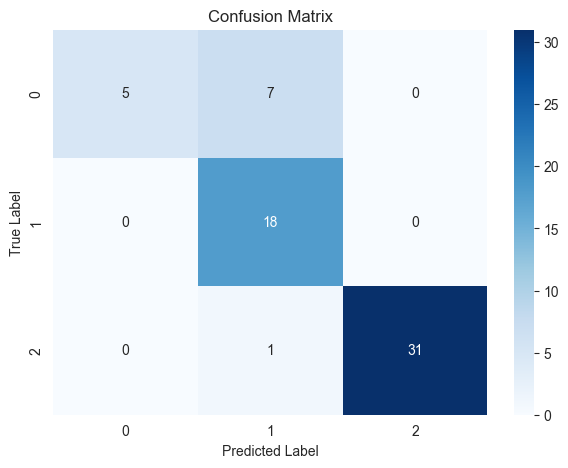

In [8]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_predict, axis=1)

conf_mtx = confusion_matrix(y_test_class, y_pred_class)

plt.figure(figsize=(7, 5))
sns.heatmap(conf_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        12
           1       0.69      1.00      0.82        18
           2       1.00      0.97      0.98        32

    accuracy                           0.87        62
   macro avg       0.90      0.80      0.80        62
weighted avg       0.91      0.87      0.86        62



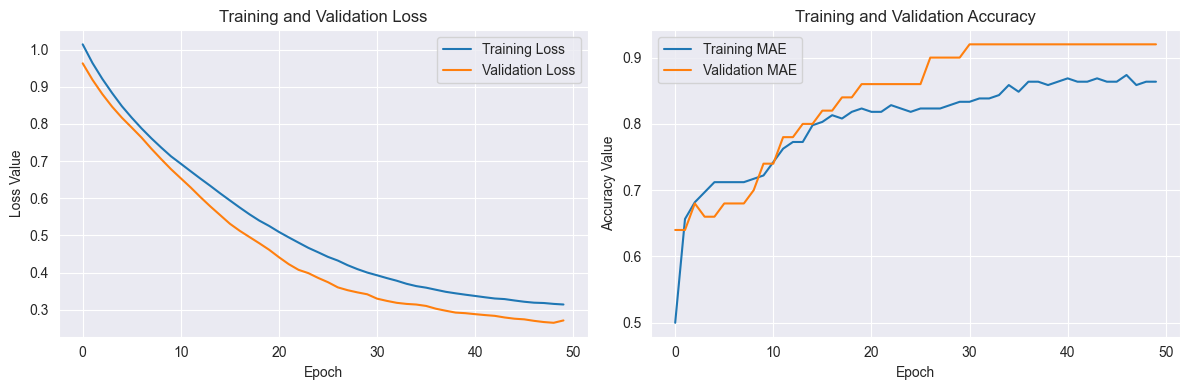

In [9]:
from sklearn.metrics import classification_report

print('\nClassification Report:\n')
print(classification_report(y_test_class, y_pred_class))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_simple.history['loss'], label='Training Loss')
plt.plot(history_simple.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_simple.history['accuracy'], label='Training MAE')
plt.plot(history_simple.history['val_accuracy'], label='Validation MAE')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.legend()
plt.tight_layout()
plt.show()
